In [87]:
import datetime
import math
import numpy as np
import pandas as pd

dataset=pd.read_csv('Dataset_INT_LOS_DIAGNOSTICOS_ADM.csv', sep='\t')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.drop('Unnamed: 0.1', axis=1, inplace=True)
adm=pd.read_excel('INT_ADMISSOES.xlsx')

In [88]:
adm=adm[['INT_EPISODIO', 'DTA_INTERNAMENTO', 'HORA_INTERNAMENTO', 'TIPO_ADMISSAO', 'COD_PROVENIENCIA']]

In [89]:
dataset1=pd.merge(dataset, adm, on='INT_EPISODIO')

In [90]:
dataset1

,INT_EPISODIO,DTA_NASCIMENTO,SEXO,NUM_TRANSFERENCIA,COD_ESPECIALIDADE,DES_ESPECIALIDADE,MOTIVO_ENTRADA,DTA_ENTRADA,HORA_ENTRADA,DTA_SAIDA,...,sequencia,proximo,des_sequencia,des_proximo,LOS,COD_DIAGNOSTICO_ADM,DTA_INTERNAMENTO,HORA_INTERNAMENTO,TIPO_ADMISSAO,COD_PROVENIENCIA
0,89100283141,1943-12-21 00:00:00,2,455441,30062,MEDICINA INTERNA UPA (INT),T,2017-01-21,14460,2017-02-16,...,301253005130062,0,UCIPSU UPA (INT) - CIRURGIA UPA (INT) - MEDICI...,ALTA,2283300.0,0,2016-12-11 00:00:00,55680,U,1
1,89105171260,1965-06-27 00:00:00,2,454055,30062,MEDICINA INTERNA UPA (INT),T,2017-01-03,70500,2017-01-23,...,30062301253010430062,0,MEDICINA INTERNA UPA (INT) - UCIPSU UPA (INT) ...,ALTA,1713900.0,486,2016-12-23 00:00:00,6540,U,1
2,89105215748,1939-12-07 00:00:00,1,454033,30102,UROLOGIA UPA (INT),T,2017-01-03,53580,2017-01-17,...,30102301043012530102,0,UROLOGIA UPA (INT) - UCIP UPA (INT) - UCIPSU U...,ALTA,1200120.0,0,2016-12-23 00:00:00,31732,P,2
3,89105538286,1937-12-10 00:00:00,2,453929,30062,MEDICINA INTERNA UPA (INT),T,2017-01-02,60720,2017-01-05,...,300623012530062,0,MEDICINA INTERNA UPA (INT) - UCIPSU UPA (INT) ...,ALTA,257700.0,0,2016-12-24 00:00:00,71940,U,1
4,89106122191,1957-11-01 00:00:00,1,454120,30051,CIRURGIA UPA (INT),T,2017-01-04,48120,2017-01-10,...,3010430051,30077,UCIP UPA (INT) - CIRURGIA UPA (INT),PSIQUIATRIA UPA (INT),522120.0,0,2016-12-26 00:00:00,67560,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102075,444998994630,1948-07-11 00:00:00,1,560950,31015,MEDICINA INTERNA USG (INT),U,2020-12-31,75120,2021-01-10,...,31015,0,MEDICINA INTERNA USG (INT),ALTA,814080.0,0,2020-12-31 00:00:00,75120,U,1
102076,444999000191,1932-05-24 00:00:00,1,560952,30063,CARDIOLOGIA UPA (INT),U,2020-12-31,77220,2021-01-05,...,30063,0,CARDIOLOGIA UPA (INT),ALTA,420600.0,0,2020-12-31 00:00:00,77220,U,1
102077,444999005752,1961-01-20 00:00:00,2,560953,30127,UCIC UPA (INT),U,2020-12-31,77220,2021-01-04,...,30127,0,UCIC UPA (INT),ALTA,322680.0,0,2020-12-31 00:00:00,77220,U,1
102078,444999011313,1940-01-29 00:00:00,1,560955,31015,MEDICINA INTERNA USG (INT),U,2020-12-31,81720,2021-01-01,...,31015,0,MEDICINA INTERNA USG (INT),ALTA,81480.0,0,2020-12-31 00:00:00,81720,U,1


In [91]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102080 entries, 0 to 102079
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INT_EPISODIO         102080 non-null  int64  
 1   DTA_NASCIMENTO       102080 non-null  object 
 2   SEXO                 102080 non-null  int64  
 3   NUM_TRANSFERENCIA    102080 non-null  int64  
 4   COD_ESPECIALIDADE    102080 non-null  int64  
 5   DES_ESPECIALIDADE    102080 non-null  object 
 6   MOTIVO_ENTRADA       102080 non-null  object 
 7   DTA_ENTRADA          102080 non-null  object 
 8   HORA_ENTRADA         102080 non-null  int64  
 9   DTA_SAIDA            102080 non-null  object 
 10  HORA_SAIDA           102080 non-null  float64
 11  COD_CLASSIFICACAO    26188 non-null   float64
 12  COD_DIAGNOSTICO      26188 non-null   object 
 13  sequencia            102080 non-null  object 
 14  proximo              102080 non-null  int64  
 15  des_sequencia    

In [92]:
dataset1['HORAS_INT']=dataset1['HORA_ENTRADA']-dataset1['HORA_INTERNAMENTO']
dataset1['DTA_ENTRADA'] = pd.to_datetime(dataset1['DTA_ENTRADA'])
dataset1['DTA_INTERNAMENTO'] = pd.to_datetime(dataset1['DTA_INTERNAMENTO'])
dataset1['DIAS_INT']=dataset1['DTA_ENTRADA']-dataset1['DTA_INTERNAMENTO']
dataset1['DIAS_INT']=dataset1['DIAS_INT'].dt.total_seconds()
dataset1['LOS_ANTERIOR']=dataset1['DIAS_INT']+dataset1['HORAS_INT']

In [93]:
dataset['COD_DIAGNOSTICO_ADM'].value_counts()

0          75892
V300        3952
V3000       2204
Z370        1361
V3001        608
           ...  
72679          1
72670          1
76521          1
2110           1
S062X9D        1
Name: COD_DIAGNOSTICO_ADM, Length: 2462, dtype: int64

In [94]:
doentes=pd.read_excel('FONTE/ide_doentes.xlsx')
doentes=doentes[['INT_EPISODIO','NUM_SEQUENCIAL']]

In [95]:
dataset=pd.merge(dataset1, doentes, on='INT_EPISODIO')

In [96]:
dataset['DTA_ENTRADA'] = pd.to_datetime(dataset['DTA_ENTRADA'])
dataset['DTA_SAIDA'] = pd.to_datetime(dataset['DTA_SAIDA'])

In [97]:
num_int=[]
ult=[]
for x in dataset.iloc:
    z=dataset[(dataset['NUM_SEQUENCIAL']==x['NUM_SEQUENCIAL'])&(dataset['DTA_ENTRADA']<x['DTA_ENTRADA'])]
    t=len(z)
    num_int.append(t)    
    
dataset['NUM_INTERNAMENTOS']=num_int

In [98]:
dataset=dataset[dataset.LOS.notnull()]
h=dataset['LOS']

In [99]:
from sklearn.ensemble import IsolationForest
h=h.values.reshape(-1,1)
clf = IsolationForest(random_state=0).fit(h)

In [100]:
dataset['Outlier']=clf.predict(h)

In [101]:
dataset['Outlier'].value_counts()

 1    82247
-1    19833
Name: Outlier, dtype: int64

In [102]:
dataset[dataset['Outlier']==1]['LOS'].min()/3600

13.666666666666666

In [103]:
dataset[dataset['Outlier']==1]['LOS'].max()/3600

244.85722222222222

In [104]:
final=dataset[dataset['Outlier']==1]

In [105]:
final['LOS'].min()

49200.0

In [106]:
import math
def arrendondar(t):
    return math.ceil(t/3600/24)
final['LOS Dia']=final['LOS'].apply(arrendondar)

/tmp/ipykernel_736277/2953206274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['LOS Dia']=final['LOS'].apply(arrendondar)


In [107]:
final['LOS Dia'].value_counts()

3     19593
2     17852
4     12905
5      7729
6      5617
7      5409
8      4265
1      3354
9      2874
10     2363
11      286
Name: LOS Dia, dtype: int64

<AxesSubplot:ylabel='Frequency'>

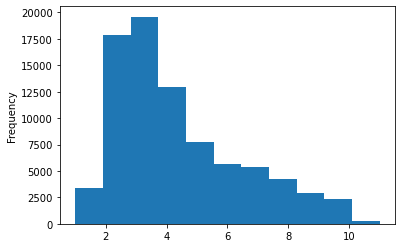

In [108]:
final['LOS Dia'].plot.hist(bins=11, alpha=1)

In [109]:
dataset['NUM_ESP_ANTERIORES']=dataset['sequencia'].apply(lambda x: len(x)/5-1)

In [110]:
esp_anteriores=dataset[['INT_EPISODIO','NUM_TRANSFERENCIA','NUM_ESP_ANTERIORES']]

In [111]:
final

,INT_EPISODIO,DTA_NASCIMENTO,SEXO,NUM_TRANSFERENCIA,COD_ESPECIALIDADE,DES_ESPECIALIDADE,MOTIVO_ENTRADA,DTA_ENTRADA,HORA_ENTRADA,DTA_SAIDA,...,HORA_INTERNAMENTO,TIPO_ADMISSAO,COD_PROVENIENCIA,HORAS_INT,DIAS_INT,LOS_ANTERIOR,NUM_SEQUENCIAL,NUM_INTERNAMENTOS,Outlier,LOS Dia
3,89105538286,1937-12-10 00:00:00,2,453929,30062,MEDICINA INTERNA UPA (INT),T,2017-01-02,60720,2017-01-05,...,71940,U,1,-11220,777600.0,766380.0,748043828,0,1,3
4,89106122191,1957-11-01 00:00:00,1,454120,30051,CIRURGIA UPA (INT),T,2017-01-04,48120,2017-01-10,...,67560,U,1,-19440,777600.0,758160.0,917470815,0,1,7
6,89106394680,1936-01-06 00:00:00,2,454127,30104,UCIP UPA (INT),T,2017-01-04,58200,2017-01-09,...,32400,P,2,25800,691200.0,717000.0,2798123161,0,1,6
7,89106394680,1936-01-06 00:00:00,2,454520,30051,CIRURGIA UPA (INT),T,2017-01-09,62220,2017-01-11,...,32400,P,2,29820,1123200.0,1153020.0,2798123161,1,1,3
8,89106394680,1936-01-06 00:00:00,2,454723,30125,UCIPSU UPA (INT),T,2017-01-11,74640,2017-01-18,...,32400,P,2,42240,1296000.0,1338240.0,2798123161,2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102075,444998994630,1948-07-11 00:00:00,1,560950,31015,MEDICINA INTERNA USG (INT),U,2020-12-31,75120,2021-01-10,...,75120,U,1,0,0.0,0.0,4132079158,0,1,10
102076,444999000191,1932-05-24 00:00:00,1,560952,30063,CARDIOLOGIA UPA (INT),U,2020-12-31,77220,2021-01-05,...,77220,U,1,0,0.0,0.0,4050933046,0,1,5
102077,444999005752,1961-01-20 00:00:00,2,560953,30127,UCIC UPA (INT),U,2020-12-31,77220,2021-01-04,...,77220,U,1,0,0.0,0.0,2419791648,0,1,4
102078,444999011313,1940-01-29 00:00:00,1,560955,31015,MEDICINA INTERNA USG (INT),U,2020-12-31,81720,2021-01-01,...,81720,U,1,0,0.0,0.0,2491689817,0,1,1


In [112]:
final= final.merge(esp_anteriores, on = ['INT_EPISODIO','NUM_TRANSFERENCIA'])

In [113]:
final

,INT_EPISODIO,DTA_NASCIMENTO,SEXO,NUM_TRANSFERENCIA,COD_ESPECIALIDADE,DES_ESPECIALIDADE,MOTIVO_ENTRADA,DTA_ENTRADA,HORA_ENTRADA,DTA_SAIDA,...,TIPO_ADMISSAO,COD_PROVENIENCIA,HORAS_INT,DIAS_INT,LOS_ANTERIOR,NUM_SEQUENCIAL,NUM_INTERNAMENTOS,Outlier,LOS Dia,NUM_ESP_ANTERIORES
0,89105538286,1937-12-10 00:00:00,2,453929,30062,MEDICINA INTERNA UPA (INT),T,2017-01-02,60720,2017-01-05,...,U,1,-11220,777600.0,766380.0,748043828,0,1,3,2.0
1,89106122191,1957-11-01 00:00:00,1,454120,30051,CIRURGIA UPA (INT),T,2017-01-04,48120,2017-01-10,...,U,1,-19440,777600.0,758160.0,917470815,0,1,7,1.0
2,89106394680,1936-01-06 00:00:00,2,454127,30104,UCIP UPA (INT),T,2017-01-04,58200,2017-01-09,...,P,2,25800,691200.0,717000.0,2798123161,0,1,6,1.0
3,89106394680,1936-01-06 00:00:00,2,454520,30051,CIRURGIA UPA (INT),T,2017-01-09,62220,2017-01-11,...,P,2,29820,1123200.0,1153020.0,2798123161,1,1,3,2.0
4,89106394680,1936-01-06 00:00:00,2,454723,30125,UCIPSU UPA (INT),T,2017-01-11,74640,2017-01-18,...,P,2,42240,1296000.0,1338240.0,2798123161,2,1,7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82242,444998994630,1948-07-11 00:00:00,1,560950,31015,MEDICINA INTERNA USG (INT),U,2020-12-31,75120,2021-01-10,...,U,1,0,0.0,0.0,4132079158,0,1,10,0.0
82243,444999000191,1932-05-24 00:00:00,1,560952,30063,CARDIOLOGIA UPA (INT),U,2020-12-31,77220,2021-01-05,...,U,1,0,0.0,0.0,4050933046,0,1,5,0.0
82244,444999005752,1961-01-20 00:00:00,2,560953,30127,UCIC UPA (INT),U,2020-12-31,77220,2021-01-04,...,U,1,0,0.0,0.0,2419791648,0,1,4,0.0
82245,444999011313,1940-01-29 00:00:00,1,560955,31015,MEDICINA INTERNA USG (INT),U,2020-12-31,81720,2021-01-01,...,U,1,0,0.0,0.0,2491689817,0,1,1,0.0


In [114]:
final.columns

Index(['INT_EPISODIO', 'DTA_NASCIMENTO', 'SEXO', 'NUM_TRANSFERENCIA',
       'COD_ESPECIALIDADE', 'DES_ESPECIALIDADE', 'MOTIVO_ENTRADA',
       'DTA_ENTRADA', 'HORA_ENTRADA', 'DTA_SAIDA', 'HORA_SAIDA',
       'COD_CLASSIFICACAO', 'COD_DIAGNOSTICO', 'sequencia', 'proximo',
       'des_sequencia', 'des_proximo', 'LOS', 'COD_DIAGNOSTICO_ADM',
       'DTA_INTERNAMENTO', 'HORA_INTERNAMENTO', 'TIPO_ADMISSAO',
       'COD_PROVENIENCIA', 'HORAS_INT', 'DIAS_INT', 'LOS_ANTERIOR',
       'NUM_SEQUENCIAL', 'NUM_INTERNAMENTOS', 'Outlier', 'LOS Dia',
       'NUM_ESP_ANTERIORES'],
      dtype='object')

In [115]:
mot=[]
for x in final.iloc:
    if x[5]=='U':
        mot.append('1')
    else:
        if x[5]=='T':
            mot.append('2')
        else:
            mot.append('3')
final['MOTIVO']=mot

s = final['sequencia'].unique()
contador = 0
id_seq = []

for y in range(final['sequencia'].nunique()):
    contador = contador + 1
    id_seq.append(contador)
    y = y + 1
seq_id=pd.DataFrame({'sequencia':s, 'ID_SEQ':id_seq})
final = pd.merge(final, seq_id, on = 'sequencia', how='left')

d_s = final['COD_DIAGNOSTICO_ADM'].unique()
contador = 0
id_dig = []

for y in range(final['COD_DIAGNOSTICO_ADM'].nunique()):
    contador = contador + 1
    id_dig.append(contador)
    y = y + 1
    
seq_dig=pd.DataFrame({'COD_DIAGNOSTICO_ADM':d_s, 'ID_DIG':id_dig})
final = pd.merge(final, seq_dig, on = 'COD_DIAGNOSTICO_ADM', how='left')

In [116]:
import datetime
t=datetime.datetime.now()
final['DTA_NASCIMENTO']=pd.to_datetime(final['DTA_NASCIMENTO'])
final['IDADE']=final['DTA_NASCIMENTO'].apply(lambda x: t-x).dt.days.astype(int)//365

In [117]:
#classificação
X = final[['ID_SEQ','IDADE','ID_DIG','SEXO','LOS_ANTERIOR','NUM_INTERNAMENTOS','TIPO_ADMISSAO','COD_PROVENIENCIA','NUM_ESP_ANTERIORES']]
y = final['proximo']

In [118]:
from collections import defaultdict
temp = defaultdict(lambda: len(temp))
X['TIPO_ADMISSAO'] = [temp[ele] for ele in X['TIPO_ADMISSAO']]

/tmp/ipykernel_736277/1145628292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TIPO_ADMISSAO'] = [temp[ele] for ele in X['TIPO_ADMISSAO']]


In [119]:
X=X.replace(np.nan,0)

In [120]:
y.value_counts()

0        71439
30062     2257
30063     1896
30051     1331
31015      775
30125      750
30052      625
30104      579
30073      509
30102      288
30140      226
30065      215
30127      206
30061      187
30064      149
30131      114
30123       92
30066       89
30132       72
30053       69
30077       58
30070       57
30142       48
30137       47
30105       39
30136       39
30138       24
30139       21
30145       21
30103       15
30075        9
30078        1
Name: proximo, dtype: int64

In [121]:
from imblearn.over_sampling import RandomOverSampler 
over_sampler = RandomOverSampler (random_state = 42) 
X, y = over_sampler.fit_resample(X, y) 

In [122]:
y.value_counts()

0        71439
30077    71439
30138    71439
30137    71439
30139    71439
30136    71439
30142    71439
30066    71439
30140    71439
30078    71439
30075    71439
30103    71439
30105    71439
30132    71439
30065    71439
30131    71439
30053    71439
31015    71439
30123    71439
30061    71439
30064    71439
30102    71439
30070    71439
30127    71439
30052    71439
30104    71439
30073    71439
30062    71439
30063    71439
30125    71439
30051    71439
30145    71439
Name: proximo, dtype: int64

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import std

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import recall_score

# CLASSIFICAÇÃO

In [134]:
model5=LogisticRegression(max_iter=300, multi_class='ovr')

In [135]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
from sklearn.model_selection import cross_val_predict

predicted5 = cross_val_predict(model5, X, y, cv=cv)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [136]:
cohen_kappa_score(y, predicted5)

0.06725656763789911

In [137]:
accuracy_score(y, predicted5)

0.09640479989921472

In [48]:
model1= DecisionTreeClassifier(max_depth=45, random_state=42)
model2 = RandomForestClassifier(max_depth=45,random_state=42)
model3= GradientBoostingClassifier(max_depth=45,random_state=42)
model4= KNeighborsClassifier()

cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [49]:
from sklearn.model_selection import cross_val_predict

predicted1 = cross_val_predict(model1, X, y, cv=cv)

In [50]:
predicted2 = cross_val_predict(model2, X, y, cv=cv)

In [ ]:
predicted3 = cross_val_predict(model3, X, y, cv=cv)

In [62]:
predicted4 = cross_val_predict(model4, X, y, cv=cv)

In [51]:
cohen_kappa_score(y, predicted1)

0.8637168005729228

In [52]:
cohen_kappa_score(y, predicted2)

0.8645548717629161

In [ ]:
cohen_kappa_score(y, predicted3)

In [63]:
cohen_kappa_score(y, predicted4)

0.618763402478722

In [53]:
accuracy_score(y, predicted1)

0.867975650555019

In [54]:
accuracy_score(y, predicted2)

0.868787532020325

In [ ]:
accuracy_score(y, predicted3)

In [64]:
accuracy_score(y, predicted4)

0.630677046151262

In [55]:
f1_score(y, predicted1, average='macro')

0.8648044404817526

In [56]:
f1_score(y, predicted2, average='macro')

0.8658170987556668

In [ ]:
f1_score(y, predicted3, average='macro')

In [65]:
f1_score(y, predicted4, average='macro')

0.7045163986320334

In [57]:
from sklearn.metrics import recall_score

In [58]:
recall_score(y, predicted1, average='macro')

0.8679756505550189

In [59]:
recall_score(y, predicted2, average='macro')

0.868787532020325

In [ ]:
recall_score(y, predicted3, average='macro')

In [66]:
recall_score(y, predicted4, average='macro')

0.6306770461512619

In [60]:
precision_score(y, predicted1, average='macro')

0.8746253026289703

In [61]:
precision_score(y, predicted2, average='macro')

0.8754854493363418

In [ ]:
precision_score(y, predicted3, average='macro')

In [67]:
precision_score(y, predicted4, average='macro')

0.9206731885600964

In [68]:
model1.fit(X, y)
model1.feature_importances_

array([0.25147218, 0.34381824, 0.03357743, 0.03831763, 0.12338695,
       0.13573221, 0.01015468, 0.0500216 , 0.01351909])

In [69]:
model2.fit(X, y)
model2.feature_importances_

array([0.24248853, 0.38285605, 0.03869818, 0.03074696, 0.12121707,
       0.10083144, 0.02400045, 0.03225522, 0.02690612])

In [70]:
model4.fit(X, y)
model4.feature_importances_

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [71]:
predictions1 = model1.predict_proba(X)
roc_auc_score(y, predictions1, multi_class='ovr')

0.9962740130923582

In [72]:
predictions2 = model2.predict_proba(X)
roc_auc_score(y, predictions2, multi_class='ovr')

0.9962650465010521

In [73]:
predictions4 = model4.predict_proba(X)
roc_auc_score(y, predictions4, multi_class='ovr')

0.8565791510189968

In [95]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = RandomForestClassifier(max_depth=27,random_state=42)

for c in ['accuracy']:
    scores = cross_val_score(model, X, y, scoring=c, cv=cv, n_jobs=-1)
    print(c+' : %.3f (%.3f)' % (mean(scores), std(scores)))

accuracy : 0.867 (0.001)


In [96]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(model, X, y, cv=cv)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

In [98]:
accuracy_score(y, predicted)

0.867011541314968

In [99]:
cohen_kappa_score(y, predicted)

0.8627215910348057

In [105]:
f1_score(y, predicted, average='macro')

0.8649601502407863

In [100]:
print(classification_report(y,predicted))

              precision    recall  f1-score   support

           0       0.96      0.57      0.72     71439
       30051       0.94      0.77      0.85     71439
       30052       0.90      0.77      0.83     71439
       30053       0.95      0.90      0.92     71439
       30061       0.99      0.94      0.96     71439
       30062       0.82      0.73      0.77     71439
       30063       0.97      0.93      0.95     71439
       30064       0.82      0.87      0.84     71439
       30065       0.84      0.80      0.82     71439
       30066       0.72      0.89      0.79     71439
       30070       1.00      0.98      0.99     71439
       30073       0.87      0.96      0.91     71439
       30075       1.00      1.00      1.00     71439
       30077       0.89      0.93      0.91     71439
       30078       1.00      1.00      1.00     71439
       30102       0.94      0.87      0.91     71439
       30103       0.98      1.00      0.99     71439
       30104       0.91    

In [101]:
model.fit(X, y)
model.feature_importances_

array([0.24597317, 0.38211762, 0.03798211, 0.0313869 , 0.12004336,
       0.09912404, 0.02434047, 0.03201542, 0.0270169 ])

<BarContainer object of 9 artists>

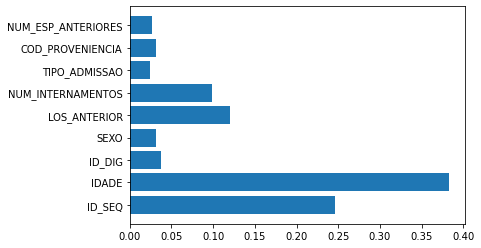

In [102]:
from matplotlib import pyplot as plt

plt.barh(X.columns, model.feature_importances_)

# PROBABILIDADE

In [106]:
predictions = model.predict_proba(X)
print(predictions)

[[9.20000000e-01 2.00000000e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.85399934e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.51460007e-01]
 [5.73895473e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 6.86797303e-02]
 [9.63867820e-03 7.59118682e-05 5.63494352e-02 ... 0.00000000e+00
  0.00000000e+00 4.70017139e-02]]


In [107]:
roc_auc_sXcore(y, predictions, multi_class='ovr')

0.9961824065288146

In [57]:
testar=X

In [58]:
predict=cross_val_predict(model1, X, y, cv=cv)
testar['predict']=predict
testar['real']=y

In [59]:
prob_0=[]
prob_30051=[]
prob_30052=[]
prob_30053=[]
prob_30061=[]
prob_30063=[]
prob_30064=[]    
prob_30065=[] 
prob_30066=[]    
prob_30077=[]    
prob_30102=[]    
prob_30103=[]    
prob_30104=[]    
prob_30123=[]    
prob_30125=[]    
prob_30127=[]    
prob_30131=[]    
prob_30132=[]    
prob_30136=[]    
prob_30137=[]    
prob_30138=[]   
prob_30139=[]    
prob_30140=[]    
prob_30142=[]    
prob_30145=[]    
prob_31015=[] 

for d in predictions:
    prob_0.append(d[0])
    prob_30051.append(d[1])
    prob_30052.append(d[2])
    prob_30053.append(d[3])
    prob_30061.append(d[4])
    prob_30063.append(d[5])
    prob_30064.append(d[6])
    prob_30065.append(d[7])
    prob_30066.append(d[8])
    prob_30077.append(d[9])
    prob_30102.append(d[10])
    prob_30103.append(d[11])
    prob_30104.append(d[12])
    prob_30123.append(d[13])
    prob_30125.append(d[14])
    prob_30127.append(d[15])
    prob_30131.append(d[16])
    prob_30132.append(d[17])
    prob_30136.append(d[18])
    prob_30137.append(d[19])
    prob_30138.append(d[20])
    prob_30139.append(d[21])
    prob_30140.append(d[22])
    prob_30142.append(d[23])
    prob_30145.append(d[24])
    prob_31015.append(d[25])
    
testar['prob_0']=prob_0
testar['prob_30051']=prob_30051
testar['prob_30052']=prob_30052
testar['prob_30053']=prob_30053
testar['prob_30061']=prob_30061
testar['prob_30063']=prob_30063
testar['prob_30064']=prob_30064
testar['prob_30065']=prob_30065
testar['prob_30066']=prob_30066
testar['prob_30077']=prob_30077
testar['prob_30102']=prob_30102
testar['prob_30103']=prob_30103
testar['prob_30104']=prob_30104
testar['prob_30123']=prob_30123
testar['prob_30125']=prob_30125
testar['prob_30127']=prob_30127
testar['prob_30131']=prob_30131
testar['prob_30132']=prob_30132
testar['prob_30136']=prob_30136
testar['prob_30137']=prob_30137
testar['prob_30138']=prob_30138
testar['prob_30139']=prob_30139
testar['prob_30140']=prob_30140
testar['prob_30142']=prob_30142
testar['prob_30145']=prob_30145
testar['prob_31015']=prob_31015

In [60]:
t=testar[['predict','real','prob_0','prob_30051','prob_30052','prob_30053','prob_30061','prob_30063','prob_30064','prob_30065','prob_30066','prob_30077','prob_30102','prob_30103','prob_30104','prob_30123','prob_30125','prob_30127','prob_30131','prob_30132','prob_30136','prob_30137','prob_30138','prob_30139','prob_30140','prob_30142','prob_30145','prob_31015']]
t[:50]

,predict,real,prob_0,prob_30051,prob_30052,prob_30053,prob_30061,prob_30063,prob_30064,prob_30065,...,prob_30131,prob_30132,prob_30136,prob_30137,prob_30138,prob_30139,prob_30140,prob_30142,prob_30145,prob_31015
0,30051,0,0.740000,0.220000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.010000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
1,30077,30077,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
2,30051,30051,0.000000,1.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
3,30125,30125,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,1.000000,0.00000,0.000000,0.0,0.000000,0.000000
4,30051,30051,0.000000,1.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
5,30051,0,0.750000,0.220000,0.010000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.010000,0.00,0.000000,0.010000,0.00000,0.000000,0.0,0.000000,0.000000
6,0,0,0.910000,0.010000,0.000000,0.00,0.00,0.080000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
7,0,0,0.910000,0.050000,0.040000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000
8,0,0,0.980000,0.010000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00,0.000000,0.010000,0.00000,0.000000,0.0,0.000000,0.000000
9,0,0,0.850000,0.000000,0.000000,0.00,0.03,0.000000,0.000000,0.000000,...,0.0,0.000000,0.11,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000


In [61]:
testar

,ID_SEQ,IDADE,ID_DIG,MOTIVO,SEXO,LOS_ANTERIOR,NUM_INTERNAMENTOS,PERIODO,NUM_INT_MESMO_DIG,PERIODO_MESMO_DIG,...,prob_30131,prob_30132,prob_30136,prob_30137,prob_30138,prob_30139,prob_30140,prob_30142,prob_30145,prob_31015
0,1,84,1,3,2,766380.0,0,1,0,1,...,0.0,0.000000,0.0,0.010000,0.000000,0.0,0.0,0.0,0.0,0.0
1,2,64,1,3,1,758160.0,0,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,3,86,1,3,2,717000.0,0,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,4,86,1,3,2,1153020.0,1,1,0,1,...,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
4,5,86,1,3,2,1338240.0,2,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286043,19,61,1,3,1,0.0,2,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2286044,19,92,1,3,2,0.0,0,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2286045,19,93,1,3,2,0.0,3,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2286046,19,55,1,3,1,0.0,1,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [62]:
testar[testar['real']!=testar['predict']]

,ID_SEQ,IDADE,ID_DIG,MOTIVO,SEXO,LOS_ANTERIOR,NUM_INTERNAMENTOS,PERIODO,NUM_INT_MESMO_DIG,PERIODO_MESMO_DIG,...,prob_30131,prob_30132,prob_30136,prob_30137,prob_30138,prob_30139,prob_30140,prob_30142,prob_30145,prob_31015
0,1,84,1,3,2,766380.0,0,1,0,1,...,0.0,0.000000,0.0,0.010000,0.000000,0.00,0.00,0.0,0.0,0.0
5,6,86,1,3,2,1921140.0,3,1,0,1,...,0.0,0.010000,0.0,0.000000,0.010000,0.00,0.00,0.0,0.0,0.0
12,12,72,3,3,1,2708520.0,2,1,0,3,...,0.0,0.010000,0.0,0.000000,0.040000,0.01,0.02,0.0,0.0,0.0
15,4,54,5,3,2,3793373.0,1,1,0,3,...,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0
23,18,93,1,3,2,0.0,0,1,0,1,...,0.0,0.000000,0.0,0.000000,0.004479,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286039,19,59,1,3,1,0.0,1,1,0,1,...,0.0,0.000000,0.0,0.000000,0.064375,0.00,0.00,0.0,0.0,0.0
2286041,19,82,1,3,1,0.0,0,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0
2286043,19,61,1,3,1,0.0,2,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0
2286046,19,55,1,3,1,0.0,1,1,0,1,...,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0


In [63]:
349745/2286048*100

15.29911007992833